# Crash data 

In [95]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import date2num
import seaborn as sns
import chart_studio.plotly as py
import plotly.tools as tls
sns.set(style="whitegrid")

In [68]:
# read data
df = pd.read_csv('Madison_crash_2009_2019.csv')

In [69]:
# Check if column in interest is actually in the dataframe
columns = list(df.columns)
column_interested = ["VEHTYPE1", "VEHTYPE2", "WTHRCOND"]
for flag in column_interested:
    if flag in columns:
        print(flag+ " is availible")

VEHTYPE1 is availible
VEHTYPE2 is availible
WTHRCOND is availible


In [70]:
#Check null value
df.isna().sum()

DOCTNMBR              0
ACCDDATE              0
NTFYHOUR              0
REGION                0
COUNTY                0
                  ...  
DRVRPC2           45775
STNM21            16884
STNM22            18021
WISLR_LATDECDG     3550
WISLR_LONDECDG     3550
Length: 66, dtype: int64

### What kind of vihicle were hit?

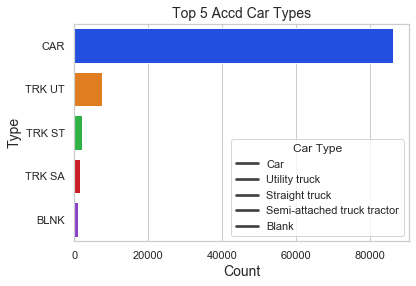

In [140]:
# get data in interest

v1 = df['VEHTYPE1'].value_counts().to_frame().reset_index()
v2 = df['VEHTYPE2'].value_counts().to_frame().reset_index()
v1.columns = ["type","count"]
v2.columns = ["type","count"]
v = v1
v["count"] = v1["count"] + v2["count"]
v = v.reset_index().sort_values(by = ['count'], ascending = False).head(5)

plot = sns.barplot(data = v, x = "count", y = "type", orient = "h", palette = 'bright')
plot.set_xlabel('Count', fontsize = 14)
plot.set_ylabel('Type', fontsize = 14)
plot.set_title('Top 5 Accd Car Types', fontsize = 14)
plot.legend(['Car', 'Utility truck', 'Straight truck', "Semi-attached truck tractor","Blank"], title='Car Type')
plot.figure.savefig('AccidCarType.png')

/Library/Python/3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


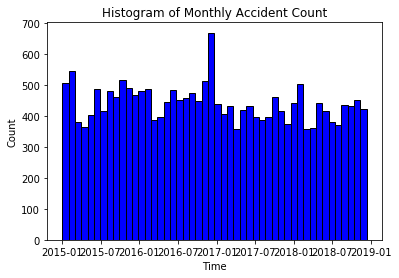

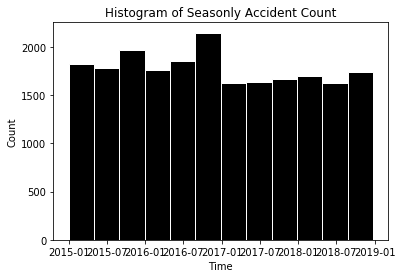

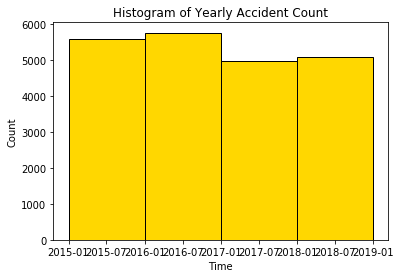

In [10]:
# date formatting
start = datetime.date(2015,1,1) 
end = datetime.date(2018,12,31)
monthBin = datetime.timedelta(days = 30)  
seasonBin = datetime.timedelta(days = 121) 
yearBin = datetime.timedelta(days = 365)  
months = []
seasons = []
years = []
for i in range(((end-start).days)//30+1):  
    months.append(start + (i)*monthBin)

for i in range(((end-start).days)//121+1):  
    seasons.append(start + (i)*seasonBin)

for i in range(((end-start).days)//365+1):  
    years.append(start + (i)*yearBin)

numMonth= date2num(months)
numSeason= date2num(seasons)
numYear = date2num(years)

# monthly plot
# prepare data
m = s = y = plt
sort_date = sorted(pd.to_datetime(dfs["ACCDDATE"]))
m.hist(x = sort_date, color = 'blue', edgecolor = 'black', bins = numMonth)
# Add labels
plt.title('Histogram of Monthly Accident Count')
plt.xlabel('Time')
plt.ylabel('Count')
m.show()


# seasonly plot
# prepare data
s.hist(x = sort_date, color = 'black', edgecolor = 'white', bins = numSeason)
# Add labels
plt.title('Histogram of Seasonly Accident Count')
plt.xlabel('Time')
plt.ylabel('Count') 
s.show()

# yearly plot
# prepare data
y.hist(x = sort_date, color = 'gold', edgecolor = 'black', bins = numYear)
# Add labels
plt.title('Histogram of Yearly Accident Count')
plt.xlabel('Time')
plt.ylabel('Count') 
y.show()


In [13]:
dfs.ACCDLOC

0        N
1        N
2        N
3        N
4        N
        ..
21398    I
21399    N
21400    I
21401    N
21402    N
Name: ACCDLOC, Length: 21403, dtype: object